In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [128]:
def show_image(hsv_image):
    plt.figure(figsize=(16,16))
    plt.imshow(hsv_image)

(1080, 1920, 3)


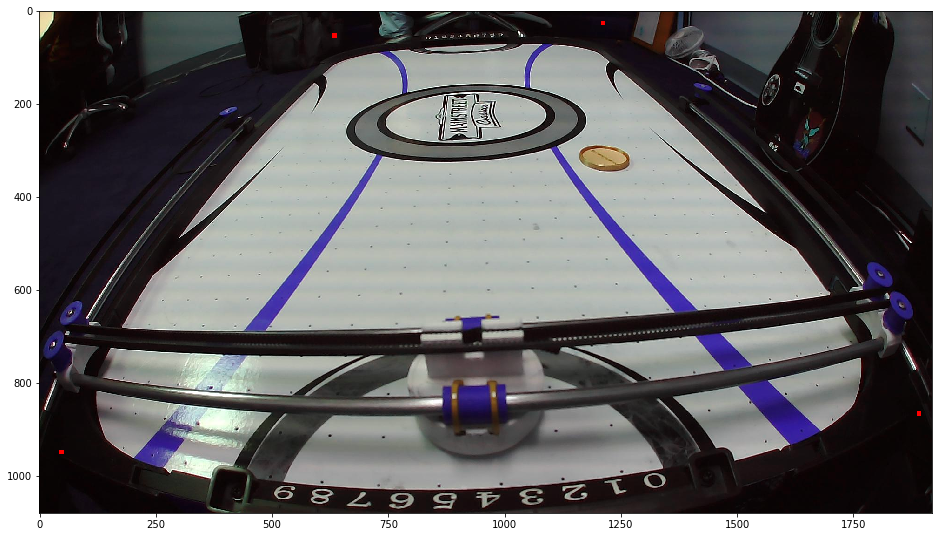

In [136]:
#Read in the starting image
raw_img = cv2.imread("Center_4.jpg")

#plt.figure(figsize=(16,16))
#plt.imshow(raw_img)

#Display the 3 corners
disp_img = raw_img.copy()
def mark_point(img, xy, radius = 5):
    img[xy[1]-radius:xy[1]+radius, xy[0]-radius:xy[0]+radius] = (255, 0, 0)
    
top_left = (636, 55)
top_right = (1213, 28)
bot_right = (1892 ,  866)
bot_left = (48, 949)
    
mark_point(disp_img, top_left)
mark_point(disp_img, top_right)
mark_point(disp_img, bot_left)
mark_point(disp_img, bot_right)

#mark_point(disp_img, 10, 400)
#mark_point(disp_img, 620, 370)
#mark_point(disp_img, 220, 108)
#mark_point(disp_img, 390, 100)

plt.figure(figsize=(16,16))
plt.imshow(disp_img)
print(disp_img.shape)

0.00202298164368


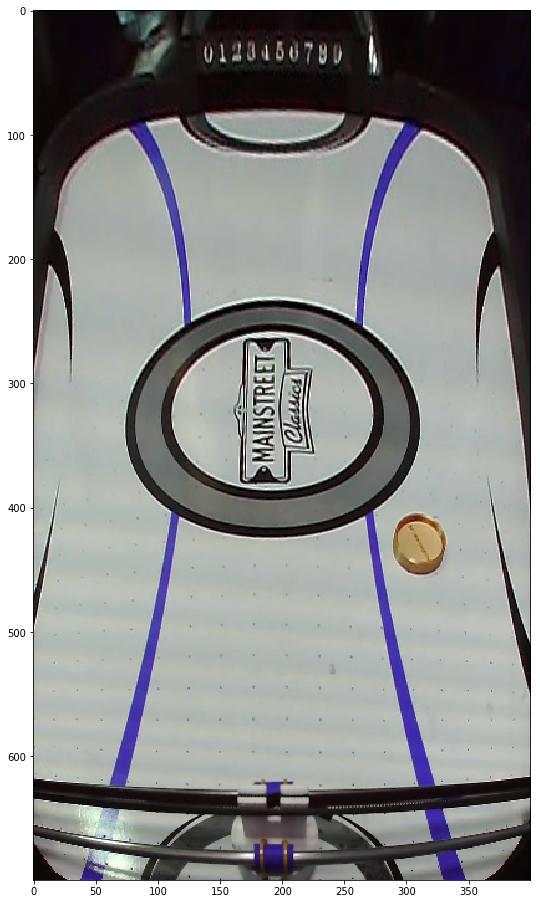

In [137]:
import time
start = time.time()
# x, y

# [topLeft[0], topLeft[1]],
# [topRight[0], topRight[1]],
# [botRight[0], botRight[1]],
# [botLeft[0], botLeft[1]]

pts_src = np.array(
    [
        [bot_left[0], bot_left[1]],
        [bot_right[0], bot_right[1]],
        [top_right[0], top_right[1]],
        [top_left[0], top_left[1]
    ]    ]
)
pts_dst = np.array(
    [
        [0, 699],
        [399, 699],
        [399, 0],
        [0, 0]        
    ]
)
h, status = cv2.findHomography(pts_src, pts_dst)

warped = cv2.warpPerspective(raw_img, h, (400, 700))
print(time.time() - start)

plt.figure(figsize=(16,16))
plt.imshow(warped)

In [90]:
puckImage = warped.copy()

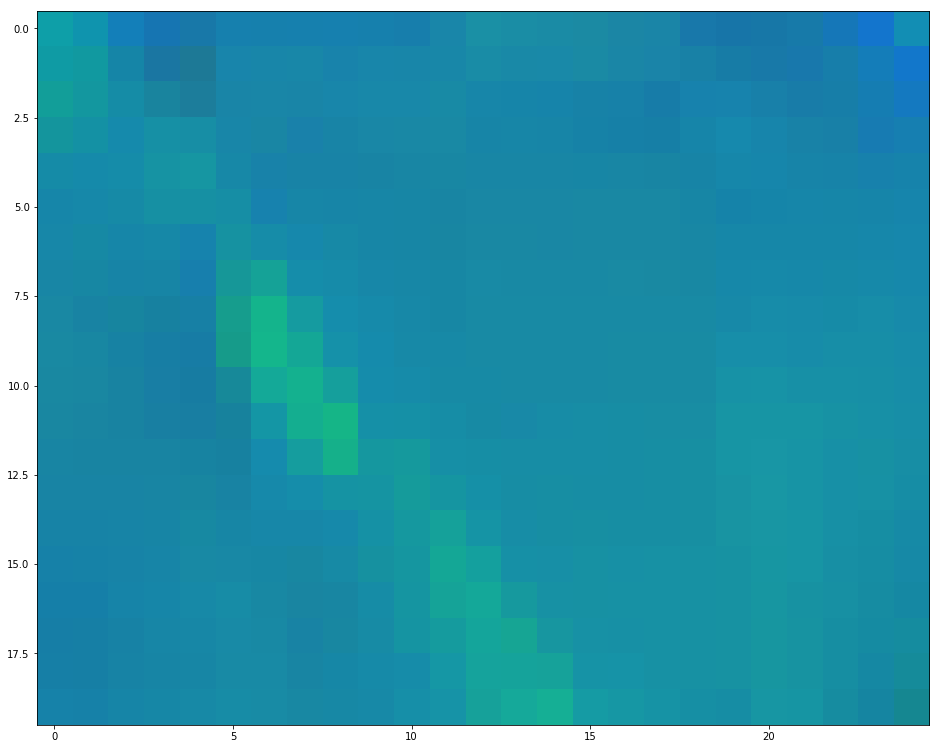

In [101]:
hsv_image=cv2.cvtColor(puckImage, cv2.COLOR_RGB2HSV)
show_image(hsv_image[395:415,110:135,:])

In [102]:
puck=hsv_image[395:415,110:135,:]

In [107]:
print puck

[[[ 14 159 168]
  [ 15 148 174]
  [ 19 127 185]
  ...
  [ 21 119 184]
  [ 19 117 205]
  [ 18 142 180]]

 [[ 15 155 164]
  [ 17 153 160]
  [ 21 133 167]
  ...
  [ 23 126 170]
  [ 20 125 185]
  [ 18 119 203]]

 [[ 18 158 153]
  [ 19 151 159]
  [ 21 140 166]
  ...
  [ 23 126 168]
  [ 21 125 178]
  [ 20 121 192]]

 ...

 [[ 22 126 166]
  [ 22 127 165]
  [ 23 130 165]
  ...
  [ 22 142 162]
  [ 21 139 162]
  [ 21 140 159]]

 [[ 22 127 166]
  [ 22 127 165]
  [ 23 131 165]
  ...
  [ 22 142 162]
  [ 21 136 163]
  [ 21 139 154]]

 [[ 22 130 169]
  [ 22 129 168]
  [ 22 133 167]
  ...
  [ 22 140 160]
  [ 21 133 161]
  [ 21 135 145]]]


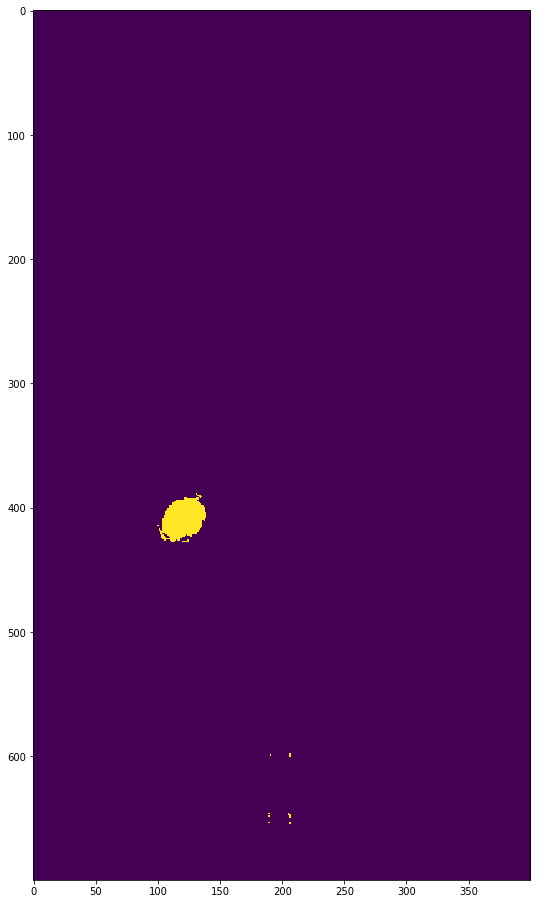

In [125]:
hsv_mask=cv2.inRange(hsv_image,np.array([20,100,100]),np.array([30,200,200]))
show_image(hsv_mask)

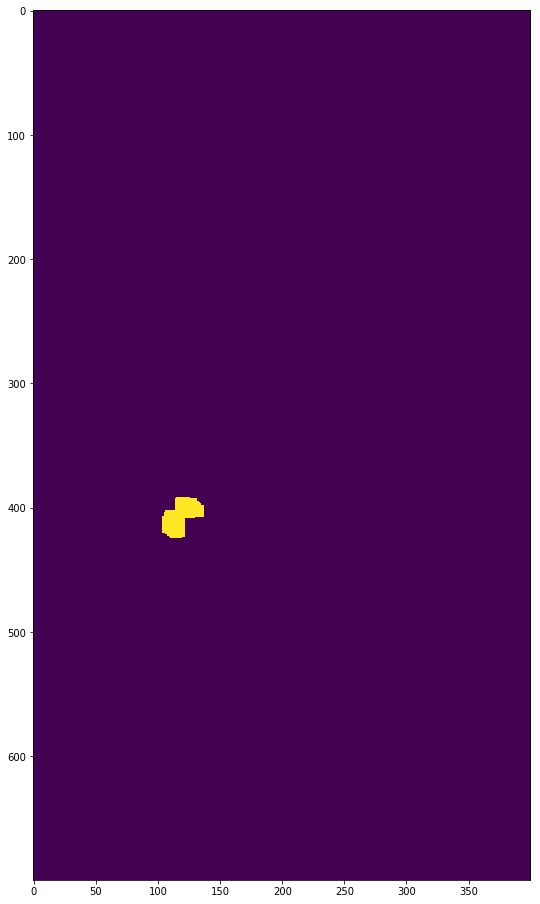

In [111]:
opened=cv2.morphologyEx(hsv_mask,cv2.MORPH_OPEN, np.ones((9,9)))
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((11,11)))
show_image(closed)

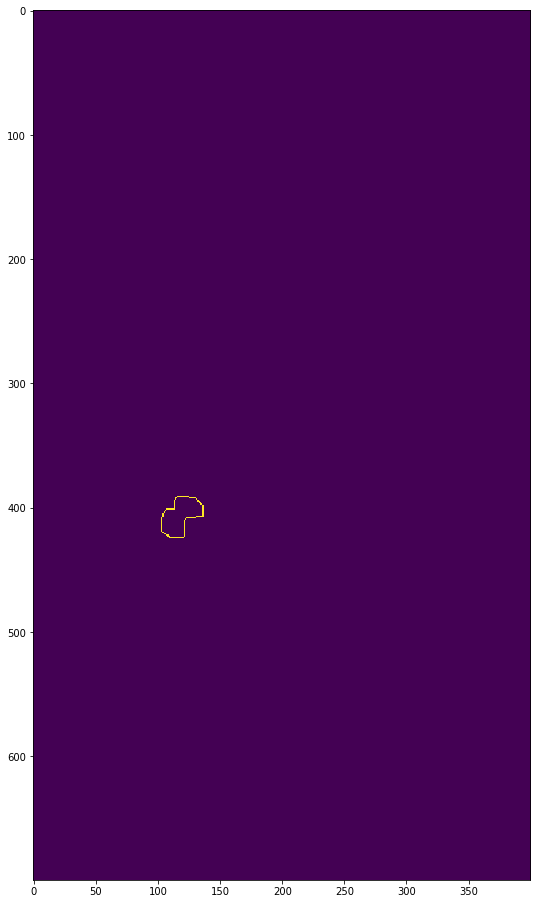

In [112]:
edges = cv2.Canny(closed,255,255)
show_image(edges)

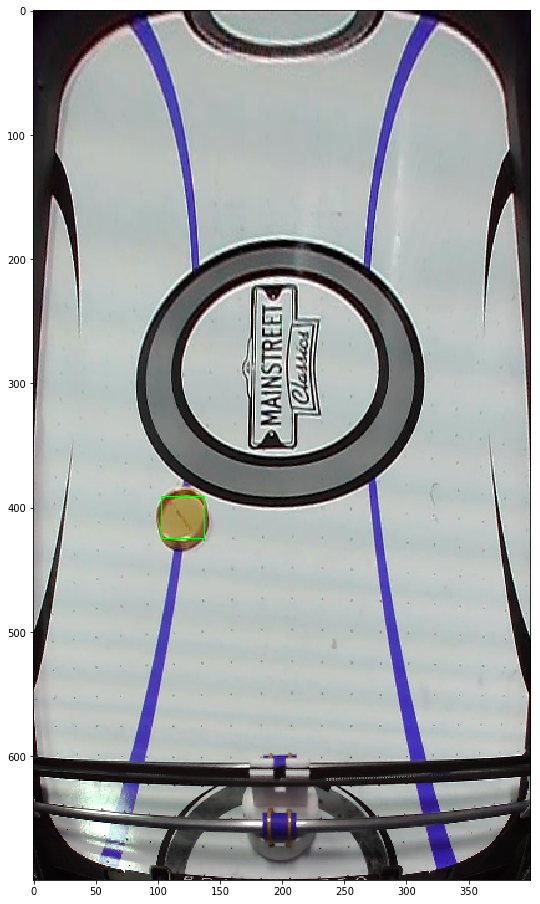

In [113]:
x,y,w,h = cv2.boundingRect(edges);
rect1=cv2.rectangle(puckImage,(x,y),(x+w,y+h),(0,255,0),1)
show_image(puckImage)